In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras.layers import Conv2D, SeparableConv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization, Activation
from keras import regularizers 
from keras import models



C:\Users\JuhaVuokko\Anaconda3\envs\MachineTime\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=80,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.2,
      zoom_range=0.1,
      horizontal_flip=False,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=90,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.2,
      zoom_range=0.1,
      horizontal_flip=False,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        'C:\\Users\\JuhaVuokko\\AnacondaProjects\\recyclingSymbols\\training',
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        'C:\\Users\\JuhaVuokko\\AnacondaProjects\\recyclingSymbols\\validating',
        target_size=(150, 150),
         #save_to_dir='C:\\Users\\JuhaVuokko\\AnacondaProjects\\recyclingSymbols\\outputs',save_prefix='N',save_format='jpeg',
        batch_size=20,
        class_mode='categorical')

Found 54 images belonging to 5 classes.
Found 45 images belonging to 5 classes.


In [3]:
model = keras.models.Sequential()
model.add(SeparableConv2D(filters=16, kernel_size=5, strides=1, use_bias=True, padding='valid', input_shape=(150, 150, 3,), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))
model.add(Dropout(0.1))

model.add(Conv2D(filters=16, kernel_size=5, strides=1, use_bias=False, padding='valid', activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))

model.add(Dropout(0.1))
model.add(Conv2D(filters=8, kernel_size=5, strides=1, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))
model.add(Flatten())
model.add(Dense(400, activation='relu'))
model.add(Dense(120))
model.add(Activation('relu'))

#model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 146, 146, 16)      139       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 73, 73, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 69, 69, 16)        6400      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 34, 34, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 34, 34, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 8)         3208      
__________

In [4]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
      
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
                        
history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=10)
           
model.save('allcatsb100e10.h5')


data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 5)
Epoch 1/100
10/10 [==============================] - 17s 2s/step - loss: 1.5645 - acc: 0.3381 - val_loss: 1.5780 - val_acc: 0.3161
Epoch 2/100
10/10 [==============================] - 15s 2s/step - loss: 1.5268 - acc: 0.3618 - val_loss: 1.5594 - val_acc: 0.3355
Epoch 3/100
10/10 [==============================] - 16s 2s/step - loss: 1.5106 - acc: 0.3851 - val_loss: 1.5699 - val_acc: 0.3290
Epoch 4/100
10/10 [==============================] - 15s 1s/step - loss: 1.5052 - acc: 0.3871 - val_loss: 1.5807 - val_acc: 0.2968
Epoch 5/100
10/10 [==============================] - 15s 1s/step - loss: 1.4696 - acc: 0.4115 - val_loss: 1.6019 - val_acc: 0.2903
Epoch 6/100
10/10 [==============================] - 15s 2s/step - loss: 1.4273 - acc: 0.4045 - val_loss: 1.6181 - val_acc: 0.2968
Epoch 7/100
10/10 [==============================] - 15s 1s/step - loss: 1.3992 - acc: 0.4585 - val_loss: 1.6995 - val_acc: 0.3097
Epoch 8/100
10/10 [

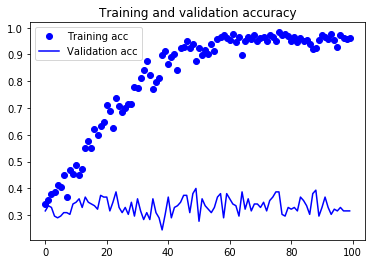

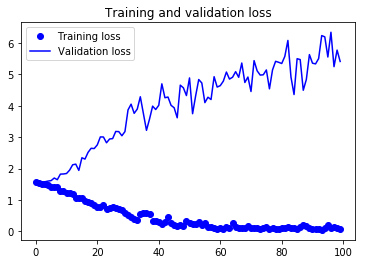

In [5]:

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()